# Linear Interpolation with Images

One of the applications mentioned in the introductory note on generative models, is the ability to interpolate between samples in a realistic manner. In other words, each step of the interpolation produces a realistic-looking image. This not only produces some cool animations, but is also useful for designers and educators.

<img src="images/1b_1_bilinear_GAN.png" style="width:50%">

The images above look pretty good, and were generated by a GAN. That's cool, but in order to really appreciate it, let's compare that to a simple baseline: how would a simple linear interpolation do? The idea behind linear interpolation is to go from one image to another image in linear steps: each pixel changes by a constant step in the sequence of intermediate images. 

If one desires mathematical precision, let $x^{(0)}$ be the first image and $x^{(n)}$ be the second image, with $n-1$ intermediate images, each represented by $x^{(i)}$ for $i \in \{1, \ldots, n-1\}$. Then each pixel $j$ of the $i^\text{th}$ image:

$$ x^{(i)}_j = x^{(0)}_j + \frac{i}{n}(x^{(n)}_j - x^{(0)}_j)$$

Let's see how this does with a few different image datasets!

### MNIST

In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scripts import celeba_utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


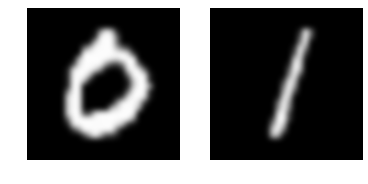

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Load the MNIST dataset.
x_0 = x_test[np.where(y_test==0)[0][0]] 
x_1 = x_test[np.where(y_test==1)[0][0]]

# Show some examples.
_, ax = plt.subplots(1, 2, figsize=[6, 3])
ax[0].imshow(x_0, cmap='gray', interpolation='bicubic'); ax[0].set_axis_off()
ax[1].imshow(x_1, cmap='gray', interpolation='bicubic'); ax[1].set_axis_off()

In [28]:
def interpolate(initial_img, final_img, n):
    images = list()
    for i in range(0, n+1):
        images.append(initial_img.astype(float) + (final_img.astype(float) - initial_img.astype(float))*i/n)
    return images

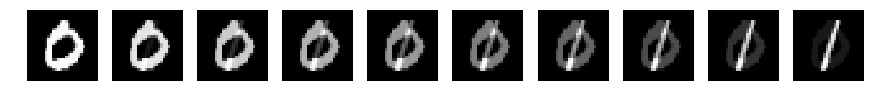

In [31]:
images = interpolate(x_0, x_1, 10)
_, ax = plt.subplots(1, 10, figsize=[15, 1.5])
for i in range(10):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_axis_off()

Clearly the intermediate stages do not look real images. But perhaps that is to be expected -- it's hard to generate intermediate digit shapes that look like real digits. What about images of faces?

## CelebA

The CelebA dataset consists of headshots of celebrities and is popularly used to train generative models. As shown above, a GAN trained on such images can produce realistic-looking interpolations between celebrities. What about linear interpolation?

In [ ]:
data_dir = 'datasets/celeba_data'
celeba_utils.download_extract('celeba', data_dir)